In [ ]:
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
#!git clone https://github.com/ultralytics/yolov5
#!cd yolov5 & pip install -r requirements.txt


1. Installer et importer les dépendances

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import torch
import cv2
import uuid
import os
import time
import datetime

2. Chargement le modèle


In [2757]:
modelM = torch.hub.load('ultralytics/yolov5', 'yolov5m')
modelM

Using cache found in C:\Users\hichem/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-22 Python-3.8.10 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 48, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(96, 48, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(48, 48, kernel_size=(1, 1), stride=(1, 1))
  

In [3]:
modelS = torch.hub.load('ultralytics/yolov5', 'yolov5s')
modelS

Using cache found in C:\Users\hichem/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-23 Python-3.8.10 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

3. Effectuer des détections avec des images

In [19]:
img = 'config/images/V_535.mp4_frame4.jpg'
results = modelM(img)
results.print()

image 1/1: 224x224 7 persons, 1 frisbee, 2 bottles
Speed: 9.0ms pre-process, 77.9ms inference, 109.4ms NMS per image at shape (1, 3, 640, 640)


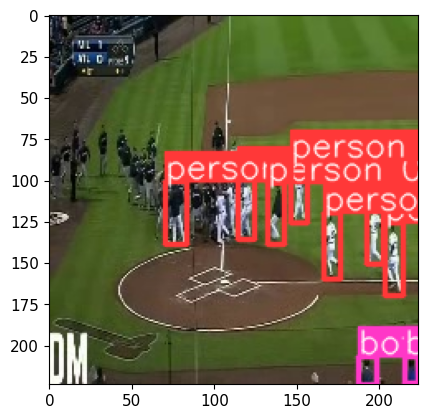

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
results.render()

[array([[[164, 184, 208],
         [164, 184, 208],
         [164, 184, 208],
         ...,
         [132, 152, 185],
         [132, 152, 185],
         [132, 152, 185]],
 
        [[163, 183, 207],
         [163, 183, 207],
         [163, 183, 207],
         ...,
         [133, 153, 186],
         [133, 153, 186],
         [133, 153, 186]],
 
        [[162, 182, 206],
         [162, 182, 206],
         [162, 182, 206],
         ...,
         [135, 155, 188],
         [134, 154, 187],
         [133, 153, 186]],
 
        ...,
 
        [[137, 121, 106],
         [136, 120, 105],
         [131, 115, 100],
         ...,
         [103,  90,  71],
         [104,  88,  72],
         [ 97,  84,  65]],
 
        [[121, 103,  91],
         [128, 110,  96],
         [131, 113,  99],
         ...,
         [102,  91,  73],
         [103,  90,  74],
         [101,  90,  72]],
 
        [[113,  95,  83],
         [125, 107,  95],
         [131, 113,  99],
         ...,
         [ 97,  85,  69],
  

4. Entrainnement à partir de zéro

In [ ]:
#!git clone https://github.com/tzutalin/labelImg

In [ ]:
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
#!cd yolov5 && python train.py --img 320 --batch 32 --epochs 150 --data dataset.yaml --weights yolov5m.pt --workers 2

In [2]:
print(torch.cuda.is_available())
print(torch.__version__)
torch.cuda.empty_cache()

True
2.2.2+cu118


In [3]:
gpu_count = torch.cuda.device_count()
print(f"Number of GPU(s): {gpu_count}")
for i in range(gpu_count):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

Number of GPU(s): 1
GPU 0: NVIDIA GeForce GTX 1650 with Max-Q Design


In [4]:
if torch.cuda.is_available():
    # Créer un tensor aléatoire et le transférer sur le GPU
    a = torch.rand(1000, 1000).cuda()
    # Effectuer un calcul simple sur le GPU
    b = a * a
    # Transférer le résultat en mémoire CPU et afficher une valeur
    print(b.cpu().numpy()[0, 0])
else:
    print("CUDA is not available.")

0.77534366


In [5]:
# Vérifie si CUDA (GPU support) est disponible dans PyTorch
if torch.cuda.is_available():
    print("Le GPU est disponible.")
    device = torch.device("cuda")
    
    # Créez un tensor aléatoire et transférez-le sur le GPU
    x = torch.rand(5, 5).to(device)
    print("Tensor sur le GPU:", x)
else:
    print("Le GPU n'est pas disponible.")

Le GPU est disponible.
Tensor sur le GPU: tensor([[0.3113, 0.5462, 0.5252, 0.7179, 0.2663],
        [0.4802, 0.6585, 0.0816, 0.0624, 0.0593],
        [0.8845, 0.3855, 0.5754, 0.1460, 0.9902],
        [0.8546, 0.2128, 0.6696, 0.2763, 0.8888],
        [0.9495, 0.2845, 0.4899, 0.3973, 0.1377]], device='cuda:0')


In [6]:
if torch.cuda.is_available():
    print("CUDA disponible. Détails du GPU:")
    print(torch.cuda.get_device_name(0))
    print("Version CUDA:", torch.version.cuda)
else:
    print("CUDA n'est pas disponible. Vérifiez votre installation.")

CUDA disponible. Détails du GPU:
NVIDIA GeForce GTX 1650 with Max-Q Design
Version CUDA: 11.8


In [9]:
# Vérifier la disponibilité de CUDA
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU disponible : ", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU non disponible, utilisation du CPU à la place.")

# Envoyer le modèle sur le GPU
model = model.to(device)

GPU disponible :  NVIDIA GeForce GTX 1650 with Max-Q Design


5. Chargement mon modèle personnalisé

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp13/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\hichem/.cache\torch\hub\master.zip
YOLOv5  2024-6-9 Python-3.8.10 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [17]:
img = os.path.join('dataset/images', 'image_20240511_205323_0.jpg')

In [18]:
## Effectuer la prédiction
results = model(img)
results.print()

image 1/1: 360x640 3 NonViolences
Speed: 7.0ms pre-process, 13.0ms inference, 96.7ms NMS per image at shape (1, 3, 384, 640)


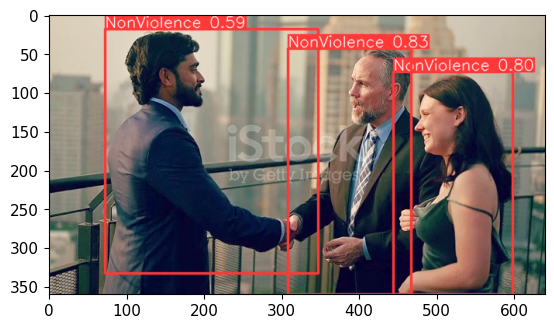

In [19]:
# Afficher l'image avec les annotations de détection
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [3]:
"""Lancement Vd et stocker les image BGR contient Hight violence en dossier dans 'CaptureJupyter' avec n'affiche pas vd seullement msg """
from IPython.display import display, clear_output
import PIL.Image as Image

# Définir et créer le dossier principal
main_folder = 'CaptureJupyter'
if not os.path.exists(main_folder):
    os.makedirs(main_folder)

# Créer un sous-dossier pour cette session
session_folder = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
session_path = os.path.join(main_folder, session_folder)
os.makedirs(session_path)
print(f"Session path: {session_path}")

# Load the video
video_path = 'test/V_8.mp4'
cap = cv2.VideoCapture(video_path)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        confidences = results.xyxy[0][:, 4].cpu().numpy()
        labels = results.xyxy[0][:, -1].cpu().numpy()

        # Display the video with YOLO detections
        display_frame = np.squeeze(results.render())
        cv2.imshow('YOLO', display_frame)

        # Save images with detected violence
        if np.any((confidences >= 0.8) & (labels == 1)):
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            image_name = f"violence_{timestamp}.jpg"
            image_path = os.path.join(session_path, image_name)
            cv2.imwrite(image_path, cv2.cvtColor(display_frame, cv2.COLOR_RGB2BGR))
            print(f"Saved: {image_path}")

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()

    cap.release()
    print("Released Video Resource")

Session path: CaptureJupyter\20240511_105426
Saved: CaptureJupyter\20240511_105426\violence_20240511_105427.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105428.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105428.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105428.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105428.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105428.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105429.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105429.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105429.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105429.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105429.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105429.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105429.jpg
Saved: CaptureJupyter\20240511_105426\violence_20240511_105430.jpg
Saved: CaptureJup

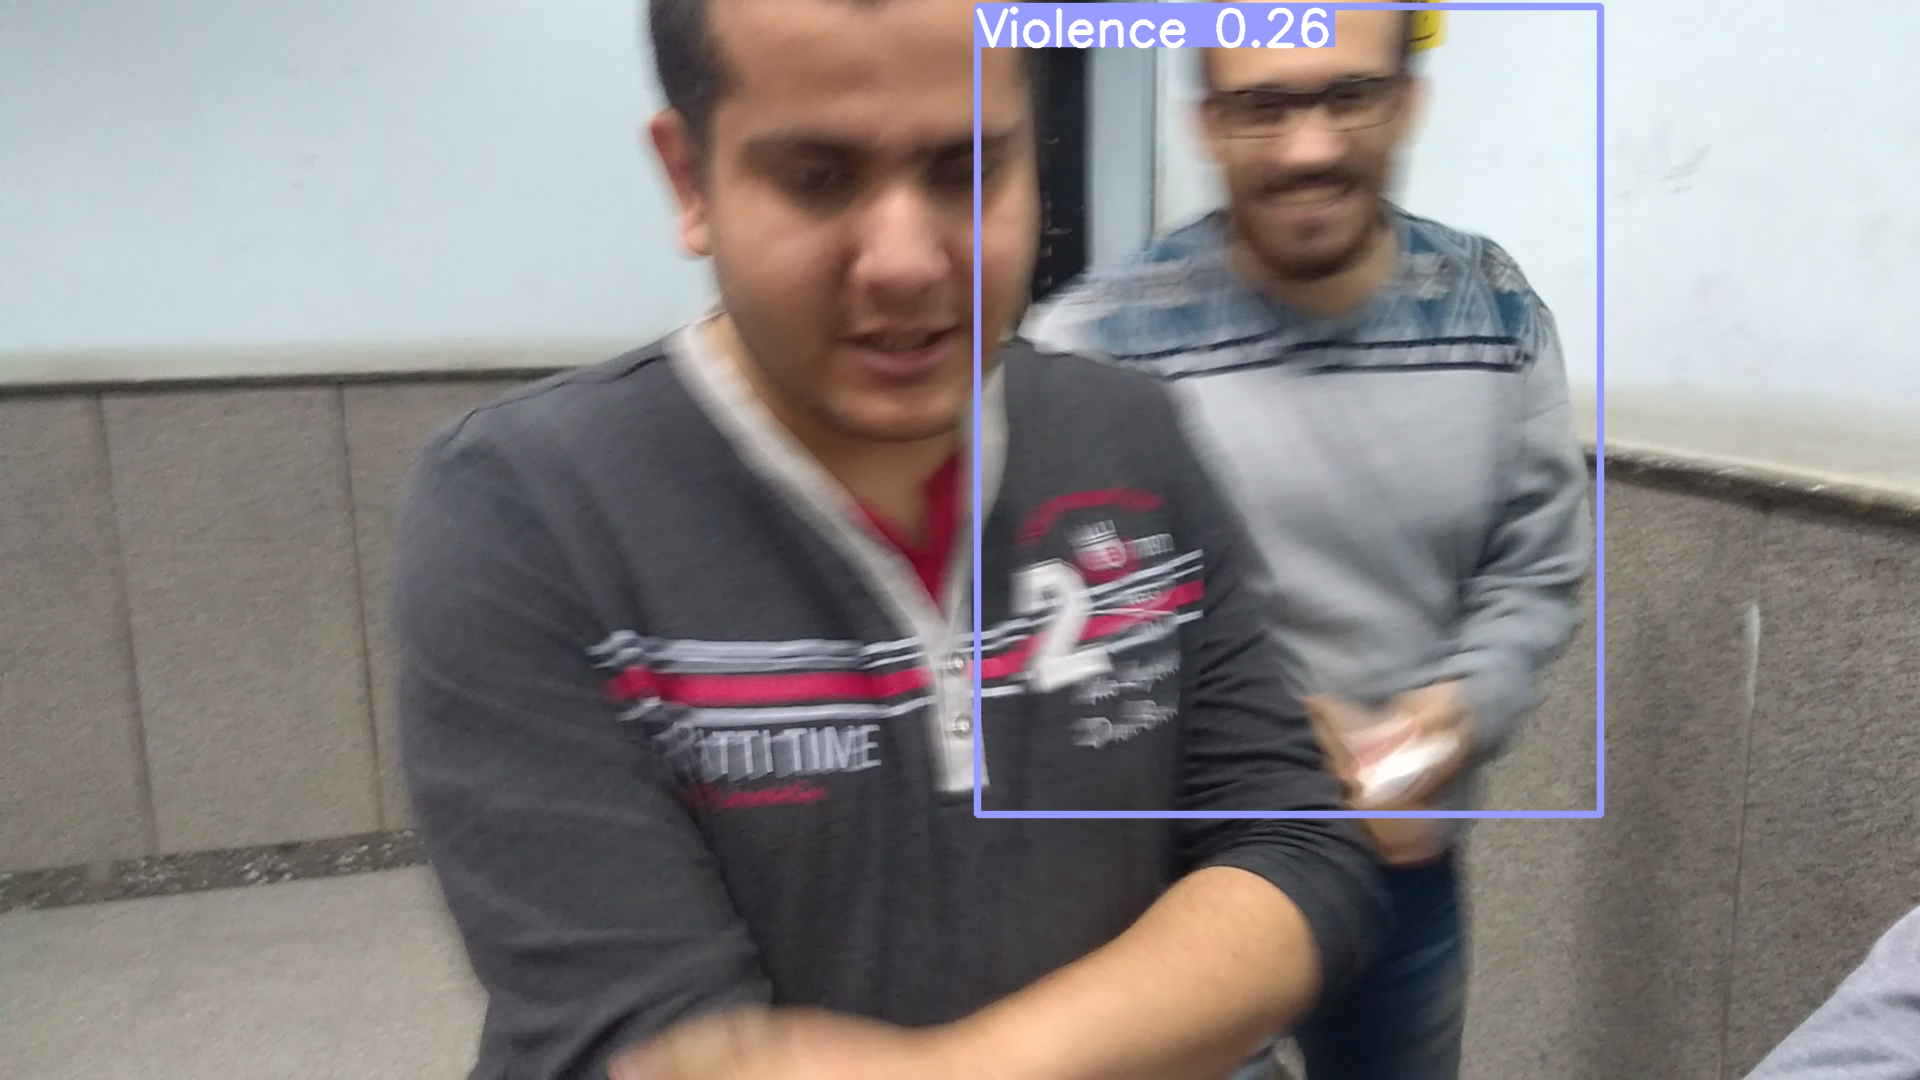

Released Video Resource


In [4]:
from IPython.display import display, clear_output
import PIL.Image as Image

# Définir et créer le dossier principal
main_folder = 'CaptureJupyter'
if not os.path.exists(main_folder):
    os.makedirs(main_folder)

# Créer un sous-dossier pour cette session
session_folder = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
session_path = os.path.join(main_folder, session_folder)
os.makedirs(session_path)
print(f"Session path: {session_path}")

# Charger la vidéo
video_path = 'test/V_8.mp4'
cap = cv2.VideoCapture(video_path)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        confidences = results.xyxy[0][:, 4].cpu().numpy()
        labels = results.xyxy[0][:, -1].cpu().numpy()

        display_frame = cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB)
        im = Image.fromarray(display_frame)
        clear_output(wait=True)
        display(im)

        # Enregistrer les images avec une détection de violence d'au moins 80% de confiance
        high_conf_indices = np.where((labels == 1) & (confidences >= 0.8))[0]
        if len(high_conf_indices) > 0:
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            for idx in high_conf_indices:
                image_name = f"violence_{timestamp}_conf_{confidences[idx]:.2f}.jpg"
                image_path = os.path.join(session_path, image_name)
                cv2.imwrite(image_path, cv2.cvtColor(display_frame, cv2.COLOR_RGB2BGR))
                print(f"Saved: {image_path}")

finally:
    cap.release()
    print("Released Video Resource")

In [5]:
"""Ouvrir WEBCAM et envoyer uniquement les 3 images ayant le pourcentage de confiance le plus élevé (supérieur à 80%) par e-mail"""
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from IPython.display import Image, display

# Configuration SMTP
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587
SMTP_USER = "hichemmhichemmh@gmail.com"
SMTP_PASSWORD = "wokn bmny vcqb rcsy"

def send_alert_email(image_path):  
    msg = MIMEMultipart()
    msg['From'] = SMTP_USER
    msg['To'] = "hiichem.mhadhbi@gmail.com"
    msg['Subject'] = "Violence detected!"
    body = "High violence detected in the webcam feed."
    msg.attach(MIMEText(body, 'plain'))
    
    with open(image_path, 'rb') as f:
        img = MIMEImage(f.read())
    img.add_header('Content-Disposition', 'attachment', filename=os.path.basename(image_path))
    msg.attach(img)

    server = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
    server.starttls()
    server.login(SMTP_USER, SMTP_PASSWORD)
    server.send_message(msg)
    server.quit()

# Start video capture
cap = cv2.VideoCapture(0)

# Load your model (ensure it is correctly configured)

# Create a unique folder for this capture session
capture_folder = os.path.join('CaptureJupyter', f"video_{int(time.time())}")
os.makedirs(capture_folder, exist_ok=True)

detected_images = []  # List to store detected images with confidence

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Process the current frame
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Check for violence detections (label 1)
    detections = results.xyxy[0]  # Detections and their details
    for detection in detections:
        label, confidence = int(detection[5]), detection[4].item()
        if label == 1:  # Violence detected
            filename = os.path.join(capture_folder, f"capture_{uuid.uuid4()}.jpg")
            cv2.imwrite(filename, frame)
            
            if confidence >= 0.8:  # High confidence
                detected_images.append((filename, confidence))
    
    # Sort detected images by confidence (descending order)
    detected_images.sort(key=lambda x: x[1], reverse=True)
    
    # Send only the top 3 detected images
    for img_path, _ in detected_images[:3]:
        send_alert_email(img_path)
    
    # Allow a short break to continue or quit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()

In [3]:
# Assurez-vous que le chemin vers 'results.csv' est correct
results_path = 'yolov5/runs/train/exp13/results.csv'

# Charger le fichier de résultats
results = pd.read_csv(results_path)

# Afficher les noms des colonnes pour vérification
print(results.columns)

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')


In [9]:
# Charger les données
results = pd.read_csv('yolov5/runs/train/exp13/results.csv')

# Nettoyer les noms des colonnes en supprimant les espaces inutiles
results.columns = results.columns.str.strip()

# Convertir les valeurs en numérique, en forçant les valeurs non numériques à NaN
results = results.apply(pd.to_numeric, errors='coerce')

# Affichage des derniers résultats de l'entraînement avec des noms de colonnes nettoyés
print("Récapitulatif des dernières epochs de l'entraînement :\n")
print(results[['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5']].tail())

# Calcul et affichage des statistiques moyennes
average_stats = {
    "Précision moyenne": results['metrics/precision'].mean(),
    "Rappel moyen": results['metrics/recall'].mean(),
    "mAP moyen à 0.5 IoU": results['metrics/mAP_0.5'].mean(),
    "Perte moyenne d'entraînement": results[['train/box_loss', 'train/obj_loss', 'train/cls_loss']].mean().mean(),
    "Perte moyenne de validation": results[['val/box_loss', 'val/obj_loss', 'val/cls_loss']].mean().mean()
}

for stat, value in average_stats.items():
    print(f"{stat} : {value:.4f}")

# Visualisation des résultats d'entraînementµ
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results['epoch'], results['metrics/precision'], label='Précision')
plt.plot(results['epoch'], results['metrics/recall'], label='Rappel')
plt.plot(results['epoch'], results['metrics/mAP_0.5'], label='mAP@0.5')
plt.title('Performance Metrics over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results['epoch'], results['train/box_loss'], label='Box Loss')
plt.plot(results['epoch'], results['train/obj_loss'], label='Object Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Class Loss')
plt.title('Training Losses over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Récapitulatif des dernières epochs de l'entraînement :

     epoch  train/box_loss  train/obj_loss  train/cls_loss  metrics/precision  \
295    295        0.019284        0.013514        0.000398            0.96735   
296    296        0.019234        0.013453        0.000397            0.96692   
297    297        0.019114        0.013469        0.000402            0.97038   
298    298        0.019102        0.013456        0.000407            0.96998   
299    299        0.019171        0.013516        0.000377            0.96970   

     metrics/recall  metrics/mAP_0.5  
295        0.010883          0.39851  
296        0.010883          0.39851  
297        0.010883          0.42082  
298        0.010883          0.41925  
299        0.010883          0.41619  
Précision moyenne : 0.9493
Rappel moyen : 0.0109
mAP moyen à 0.5 IoU : 0.1640
Perte moyenne d'entraînement : 0.0143
Perte moyenne de validation : nan


In [5]:
# Assurez-vous que le chemin vers 'results.csv' est correct
results_path = 'yolov5/runs/train/exp13/results.csv'

# Charger le fichier de résultats
results = pd.read_csv(results_path)

# Nettoyer les noms des colonnes
results.columns = results.columns.str.strip()

# Calculer les moyennes des métriques clés
average_precision = results['metrics/precision'].mean()
average_recall = results['metrics/recall'].mean()
average_map_05 = results['metrics/mAP_0.5'].mean()
average_map_05_095 = results['metrics/mAP_0.5:0.95'].mean()

# Afficher les performances calculées
print("Moyenne de la précision : {:.2f}".format(average_precision))
print("Moyenne du rappel : {:.2f}".format(average_recall))
print("Moyenne de mAP (IoU=0.5) : {:.2f}".format(average_map_05))
print("Moyenne de mAP (IoU=0.5:0.95) : {:.2f}".format(average_map_05_095))

Moyenne de la précision : 0.95
Moyenne du rappel : 0.01
Moyenne de mAP (IoU=0.5) : 0.16
Moyenne de mAP (IoU=0.5:0.95) : 0.15


In [ ]:
"""import cv2
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Fonction pour obtenir les labels de vérité terrain
def get_ground_truth_labels(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Implémentation fictive : retourne aléatoirement des labels de vérité terrain pour chaque frame
    return np.random.randint(2, size=(frame_count,))

def detect_violence_in_frame(frame):
    # Utiliser le modèle YOLOv5 pour détecter la violence dans la frame
    results = model(frame)  # Faire la prédiction avec le modèle
    preds = results.xyxy[0]  # Récupérer les prédictions
    pred_labels = preds[:, -1].cpu().numpy() if preds.shape[0] > 0 else np.array([])

    # Vérifier si la classe "violence" (label 1) est détectée
    violence_detected = 1 in pred_labels
    
    return violence_detected
    
# Fonction pour effectuer la détection de violence et calculer les métriques de performance
def detect_violence(video_path):
    cap = cv2.VideoCapture(video_path)
    
    gt_labels = get_ground_truth_labels(video_path)
    pred_labels = []  # Labels prédits par le modèle

    try:
        frame_number = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Effectuer la détection de violence
            results = model(frame)
            preds = results.xyxy[0]  # Récupérer les prédictions
            pred_labels.append(1 if 1 in preds[:, -1].cpu().numpy() else 0)

            frame_number += 1

    finally:
        cap.release()

    # Calculer les métriques de performance
    precision, recall, f_score, accuracy = calculate_metrics(gt_labels, np.array(pred_labels))

    return precision, recall, f_score, accuracy


# Fonction pour calculer les métriques
def calculate_metrics(gt_labels, pred_labels):
    precision, recall, f_score, _ = precision_recall_fscore_support(gt_labels, pred_labels, average='binary')
    accuracy = accuracy_score(gt_labels, pred_labels)
    return precision, recall, f_score, accuracy

# Exemple d'utilisation :
video_path = 'test/istockphoto-1133717965-640_adpp_is.mp4'  # Chemin vers la vidéo à tester (à remplacer par votre propre chemin)
precision, recall, f_score, accuracy = detect_violence(video_path)
print("Précision:", precision)
print("Rappel:", recall)
print("F-score:", f_score)
print("Accuracy:", accuracy)"""

In [34]:
"""from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def create_directory_for_video(video_path):
    base_dir = 'CapturePerformance'
    if not os.path.exists(base_dir):
        os.mkdir(base_dir)
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    video_dir = os.path.join(base_dir, video_name + '_' + datetime.datetime.now().strftime('%Y%m%d_%H%M%S'))
    os.makedirs(video_dir, exist_ok=True)
    return video_dir

def process_video(video_path):
    video_dir = create_directory_for_video(video_path)
    cap = cv2.VideoCapture(video_path)
    frame_index = 0
    pred_labels = []

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            results = model(frame)
            predictions = results.xyxy[0]
            violence_detected = False
            
            for pred in predictions.cpu().numpy():
                if pred[5] == 1 and pred[4] > 0.8:  # Classe 1 pour la violence avec une confiance > 0.8
                    violence_detected = True
                    img_path = os.path.join(video_dir, f'frame_{frame_index:04d}_conf_{pred[4]:.2f}.jpg')
                    cv2.imwrite(img_path, frame)
            
            pred_labels.append(1 if violence_detected else 0)
            frame_index += 1
    finally:
        cap.release()

    return pred_labels

def calculate_performance_metrics(pred_labels):
    # Puisque les vraies étiquettes ne sont pas fournies, les métriques ci-dessous sont fictives
    gt_labels = np.random.randint(2, size=(len(pred_labels),))  # Fictif: génération aléatoire des labels de vérité terrain
    precision, recall, fscore, _ = precision_recall_fscore_support(gt_labels, pred_labels, average='binary')
    accuracy = accuracy_score(gt_labels, pred_labels)
    return precision, recall, fscore, accuracy

# Exécution du script sur une vidéo spécifique
video_path = 'Real Life Violence Dataset/NonViolence/NV_33.mp4'
pred_labels = process_video(video_path)
precision, recall, fscore, accuracy = calculate_performance_metrics(pred_labels)

print(f"Précision: {precision:.4f}")
print(f"Rappel: {recall:.4f}")
print(f"F-score: {fscore:.4f}")
print(f"Accuracy: {accuracy:.4f}")"""

Précision: 0.0000
Rappel: 0.0000
F-score: 0.0000
Accuracy: 0.5564


In [4]:
import cv2
import torch
import numpy as np
import os
import datetime
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Fonctions définies pour la création de répertoires, le traitement de vidéos et le calcul des performances
def create_directory_for_video(video_path):
    # Crée un répertoire pour stocker les images détectées
    base_dir = 'CapturePerformance'
    if not os.path.exists(base_dir):
        os.mkdir(base_dir)
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    video_dir = os.path.join(base_dir, video_name + '_' + datetime.datetime.now().strftime('%Y%m%d_%H%M%S'))
    os.makedirs(video_dir, exist_ok=True)
    return video_dir

def process_video(video_path):
    # Traite chaque image de la vidéo pour détecter la violence
    video_dir = create_directory_for_video(video_path)
    cap = cv2.VideoCapture(video_path)
    frame_index = 0
    pred_labels = []

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Détectez la violence et enregistrez l'image si nécessaire
            results = model(frame)
            predictions = results.xyxy[0]
            frame_with_detections = np.squeeze(results.render())
            violence_detected = False

            for pred in predictions.cpu().numpy():
                if pred[5] == 1 and pred[4] > 0.8:
                    violence_detected = True
                    img_path = os.path.join(video_dir, f'frame_{frame_index:04d}_conf_{pred[4]:.2f}.jpg')
                    cv2.imwrite(img_path, frame_with_detections)

            pred_labels.append(1 if violence_detected else 0)
            frame_index += 1
    finally:
        cap.release()

    return pred_labels

def calculate_performance_metrics(pred_labels):
    # Calcule les métriques en utilisant les étiquettes prédites et un jeu fictif de vraies étiquettes
    gt_labels = np.random.randint(2, size=(len(pred_labels),))
    precision, recall, fscore, _ = precision_recall_fscore_support(gt_labels, pred_labels, average='binary')
    accuracy = accuracy_score(gt_labels, pred_labels)
    return precision, recall, fscore, accuracy

# Exécution de la fonction sur une vidéo
video_path = 'test/V_78.mp4'
pred_labels = process_video(video_path)
precision, recall, fscore, accuracy = calculate_performance_metrics(pred_labels)
print(f"Précision: {precision:.4f}")
print(f"Rappel: {recall:.4f}")
print(f"F-score: {fscore:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Précision: 0.4500
Rappel: 0.4154
F-score: 0.4320
Accuracy: 0.5267


In [12]:
import torch
import cv2
import os
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Fonction pour lire les annotations YOLO
def read_yolo_label(label_path):
    with open(label_path, 'r') as file:
        labels = []
        for line in file:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            labels.append((class_id, x_center, y_center, width, height))
        return labels

# Fonction pour convertir les annotations YOLO en coordonnées absolues
def yolo_to_absolute(labels, img_width, img_height):
    abs_labels = []
    for class_id, x_center, y_center, width, height in labels:
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)
        abs_labels.append((class_id, x1, y1, x2, y2))
    return abs_labels

# Calcul de l'IoU (Intersection over Union)
def iou(box1, box2):
    x1_inter = max(box1[1], box2[1])
    y1_inter = max(box1[2], box2[2])
    x2_inter = min(box1[3], box2[3])
    y2_inter = min(box1[4], box2[4])
    inter_area = max(0, x2_inter - x1_inter + 1) * max(0, y2_inter - y1_inter + 1)
    box1_area = (box1[3] - box1[1] + 1) * (box1[4] - box1[2] + 1)
    box2_area = (box2[3] - box2[1] + 1) * (box2[4] - box2[2] + 1)
    iou = inter_area / float(box1_area + box2_area - inter_area)
    return iou

# Calcul des métriques de précision et de rappel
def calculate_metrics(pred_boxes, true_boxes, iou_threshold=0.5):
    TP = 0
    FP = 0
    FN = 0
    
    for pred, true in zip(pred_boxes, true_boxes):
        detected = []
        for t_box in true:
            matched = False
            for p_box in pred:
                if iou(t_box, p_box) > iou_threshold:
                    if p_box not in detected:
                        TP += 1
                        detected.append(p_box)
                        matched = True
                        break
            if not matched:
                FN += 1
        FP += len(pred) - len(detected)

    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    
    return precision, recall

# Tester toutes les images dans le dossier Val
def test_all_images(image_folder, label_folder):
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]
    pred_boxes = []
    true_boxes = []
    
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        label_path = os.path.join(label_folder, os.path.splitext(image_file)[0] + '.txt')
        
        # Lire l'image
        img = cv2.imread(image_path)
        h, w, _ = img.shape
        
        # Lire les annotations
        true_labels = read_yolo_label(label_path)
        true_abs_labels = yolo_to_absolute(true_labels, w, h)
        
        # Effectuer l'inférence
        results = model(img)
        predictions = results.xyxy[0].cpu().numpy()
        
        # Filtrer les prédictions pour confiance >= 0.8
        filtered_preds = [pred for pred in predictions if pred[4] >= 0.5]
        pred_abs_labels = [(int(pred[5]), int(pred[0]), int(pred[1]), int(pred[2]), int(pred[3])) for pred in filtered_preds]
        
        pred_boxes.append(pred_abs_labels)
        true_boxes.append(true_abs_labels)
    
    # Calculer les métriques
    precision, recall = calculate_metrics(pred_boxes, true_boxes, iou_threshold=0.5)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

# Chemins des dossiers d'images et de labels
image_folder = 'Val/images'
label_folder = 'Val/labels'

# Tester toutes les images et afficher les résultats
test_all_images(image_folder, label_folder)

Precision: 0.48
Recall: 0.42
